In [26]:
import osmnx as ox
import geojson
import pandas as pd
import os

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    # Fetch postal code polygons from OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    # Create GeoJSON features from the input data
    geojson_features = [geojson.Feature(geometry=polygon, properties={"postal_code": postal_code}) for postal_code, polygon in data.items()]
    
    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    # Determine the script's directory
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    
    # Create the full path for the GeoJSON file
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {saved_file_path}")


Kassel GeoJSON data saved to c:\Users\hamud\Documents\Retoflow\Project_Filter\Retoflow_Filter\Check_Out_Leon\Kassel_geojson_data.geojson


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [27]:
place_geojson_data

{"features": [{"geometry": {"coordinates": [[[9.488626, 51.292355], [9.488773, 51.292802], [9.489068, 51.293375], [9.489716, 51.293843], [9.49037, 51.294303], [9.492139, 51.294953], [9.494619, 51.295347], [9.497741, 51.295895], [9.500022, 51.297124], [9.501846, 51.298747], [9.502056, 51.300523], [9.50178, 51.303062], [9.501988, 51.30499], [9.502339, 51.305903], [9.502779, 51.307419], [9.503035, 51.308385], [9.503592, 51.309777], [9.503762, 51.310684], [9.50382, 51.311646], [9.503949, 51.312178], [9.504051, 51.312513], [9.504248, 51.313226], [9.506718, 51.31519], [9.507177, 51.314864], [9.506969, 51.314716], [9.507321, 51.314293], [9.508086, 51.313938], [9.508375, 51.314095], [9.508608, 51.31392], [9.508946, 51.31359], [9.509212, 51.313072], [9.509793, 51.312549], [9.509929, 51.31225], [9.510184, 51.312033], [9.510526, 51.311935], [9.510597, 51.311494], [9.51104, 51.311104], [9.512688, 51.311277], [9.51353, 51.311932], [9.514029, 51.312316], [9.514827, 51.312809], [9.515975, 51.313239],

In [28]:
place_postal_code_polygons

{'34123': <POLYGON ((9.489 51.292, 9.489 51.293, 9.489 51.293, 9.49 51.294, 9.49 51.29...>,
 '34121': <POLYGON ((9.449 51.313, 9.45 51.313, 9.478 51.312, 9.478 51.312, 9.479 51.3...>,
 '34233': <POLYGON ((9.485 51.378, 9.485 51.378, 9.486 51.378, 9.486 51.378, 9.486 51....>,
 '34125': <POLYGON ((9.503 51.321, 9.504 51.321, 9.504 51.321, 9.506 51.321, 9.507 51....>,
 '34128': <POLYGON ((9.369 51.349, 9.37 51.349, 9.37 51.35, 9.371 51.35, 9.371 51.35, ...>,
 '34131': <POLYGON ((9.351 51.307, 9.352 51.307, 9.352 51.308, 9.353 51.308, 9.354 51....>,
 '34132': <POLYGON ((9.362 51.293, 9.362 51.293, 9.363 51.293, 9.363 51.294, 9.364 51....>,
 '34119': <POLYGON ((9.446 51.315, 9.446 51.317, 9.447 51.317, 9.448 51.318, 9.449 51....>,
 '34130': <POLYGON ((9.409 51.326, 9.41 51.328, 9.412 51.328, 9.414 51.328, 9.42 51.32...>,
 '34134': <POLYGON ((9.43 51.3, 9.431 51.301, 9.433 51.301, 9.434 51.301, 9.442 51.302...>,
 '34117': <POLYGON ((9.476 51.321, 9.478 51.321, 9.48 51.321, 9.482 51.321, 9.48

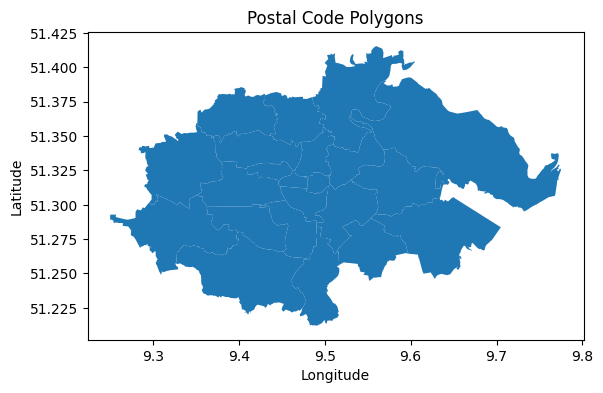

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_geojson_data(geojson_file_path):
    """
    Plots GeoJSON data using GeoPandas.
    """
    # Load GeoJSON data using GeoPandas
    gdf = gpd.read_file(geojson_file_path)

    # Plot GeoDataFrame
    gdf.plot()

    # Display the plot
    plt.title("Postal Code Polygons")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Beispielaufruf der Plot-Funktion
plot_geojson_data(saved_file_path)

Test Function: Find nearest Postal Code, using a Point (Lat,Long)

In [32]:
from shapely.geometry import Point

def get_postal_code_for_point(latitude, longitude, postal_code_polygons):
    """
    Returns the postal code for a point specified by latitude and longitude.
    """
    # Create a Point object for the specified latitude and longitude
    point = Point(longitude, latitude)
    
    # Check each postal code polygon to see if it contains the point
    for postal_code, polygon in postal_code_polygons.items():
        if polygon.contains(point):
            # If the polygon contains the point, return its postal code
            return postal_code
    
    # If no polygon contains the point, return None
    return None


Load Data & Call Function

In [34]:
import json
from shapely.geometry import shape

# Load the GeoJSON data from the file
with open(saved_file_path, 'r') as file:
    geojson_data = json.load(file)

# Convert the GeoJSON data to a dictionary mapping postal codes to polygons
postal_code_polygons = {feature['properties']['postal_code']: shape(feature['geometry']) for feature in geojson_data['features']}

# Now you can use this dictionary with the get_postal_code_for_point function
latitude = 51.316669
longitude = 9.500000
postal_code = get_postal_code_for_point(latitude, longitude, postal_code_polygons)
print(f"The postal code for the point ({latitude}, {longitude}) is: {postal_code}")



The postal code for the point (51.316669, 9.5) is: 34117


Test erfolgreich: Lat,Long sind Kassel's Koordinaten, 34117 ist Kassel Mitte, aka. das Zentrum.